# DAV 6150 Project 2
-by Group Manling Yang, Xiaojia He, Qi Sun

The link of the video: https://screencast-o-matic.com/watch/cYiYexE2rp


## 1. Introduction

The aim of this study is to segment the site visitors and use SVM to predict if web visitors will make a purchase. 

The dataset consists of feature vectors belonging to 12,330 sessions.

**Attribute Information:**

The first dataset consists of 14 numerical, 2 categorical attributes, and 1 boolean variable.
The second dataset has one attribute -'Revenue' which is the actual class label. “Revenue” feature indicates whether the visit results in transaction finalization.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session. 

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

**Domain Knowledge:**

https://pdfs.semanticscholar.org/43ee/b86bf2a9c4171b829703f2f82fac21c80791.pdf

| Feature Name  | Feature Description 
| ------------- | ------- 
| Administrative |  Number of pages visited by the visitor about account management      
| Administrative Duration      | Total amount of time (in seconds) spent by the visitor on account management related pages  
| Informational      | Number of pages visited by the visitor about website, communication and address information of the shopping site 
| Informational Duration  | Total amount of time (in seconds) spent by the visitor on informational pages  
| Product Related     | Number of pages visited by a visitor about product-related pages 
| Product Related Duration   | Total amount of time (in seconds) spent by the visitor on product related pages   
| Bounce Rate   | the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
| Exit Rate      | t is calculated as for all pageviews to the page, the percentage that was the last in the session. 
| Page Value           | the average value for a web page that a user visited before completing an e-commerce transaction.  
| Special Day | Closeness of the site visiting time to a special day


The traffic type is website traffic is a number of people who come to your site through various channels. Website traffic is categorized in different types depending on where the users came from. Types of website traffic include: Direct Traffic, Organic Traffic
Paid Traffic， Referral Traffic，and Social Media Traffic.
https://www.acmethemes.com/blog/types-of-website-traffic/


The bounce rate is the percentage of single-page website visits. It tells us what % of the website visitors left after viewing only one page. Naturally, we want this number to be as low as possible. There are a number of factors that could contribute to a high bounce rate. Generally, a high bounce rate could point to the lack of relevant content, usability issues, poor presentation, etc. It should be noted that “single-page” visitors don’t necessarily mean there’s something wrong with your website design and development. A visitor may have come to your site to find your phone number, address, etc. Once they had the information they needed, there was no need to visit another page.
https://www.purelybranded.com/insights/top-10-website-analytics-you-should-be-measuring-and-learning-from/


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve


In [4]:
# read data from Github
df = pd.read_csv("https://raw.githubusercontent.com/susanqisun/DAV-6150/master/assignments/Project2_Data.csv")

# To display the top 5 rows
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


In [5]:
# read data from Github
df02 = pd.read_csv("https://raw.githubusercontent.com/susanqisun/DAV-6150/master/assignments/Project2_Data_Labels.csv")

# To display the top 5 rows
df02.head()

,Revenue
0,True
1,False
2,False
3,False
4,False


## 2. Pre-Clustering Exploratory Data Analysis

In [6]:
print(df.shape)
print(list(df.columns))

(12330, 17)
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


In [7]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

# how many '?' values
df_info['?Values']=(df=='?').sum()

df_info

C:\Users\13750\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
Administrative,int64,27,0,12330,5768,0
Administrative_Duration,float64,3335,0,12330,5903,0
Informational,int64,17,0,12330,9699,0
Informational_Duration,float64,1258,0,12330,9925,0
ProductRelated,int64,311,0,12330,38,0
ProductRelated_Duration,float64,9551,0,12330,755,0
BounceRates,float64,1872,0,12330,5518,0
ExitRates,float64,4777,0,12330,76,0
PageValues,float64,2704,0,12330,9600,0
SpecialDay,float64,6,0,12330,11079,0


There's no missing value in this dataset. The data types include int64, float64, bool, and object.

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


#### Findings: 
>1. The maximum value of attributes Administrative_Duration, Informational_Duration, ProductRelated, PageValues, and ProductRelated_Duration has a large difference to their 75% values. It will have a significant impact on model accuracy. So, we should standardize the numerical data.
2. The attribute OperatingSystems, Browser, Region, and TrafficType are categorical data. We need to extract them before standardization. 

In [8]:
# define numerical, categorical, and boolean data
numerical_columns = []
boolean_column = []
categorical_columns = []

for i in df.columns[:]:
    if(df[i].dtype=='object'):
        categorical_columns.append(i)
    elif (df[i].dtype=='bool'):
        boolean_column.append(i)
    else:
        numerical_columns.append(i)
        
print('1. Numerical variables:',numerical_columns)
print('2. Boolean variable:',boolean_column)
print('3. Categorical variables:',categorical_columns)


1. Numerical variables: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
2. Boolean variable: ['Weekend']
3. Categorical variables: ['Month', 'VisitorType']


C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DC261A780>,
      dtype=object)

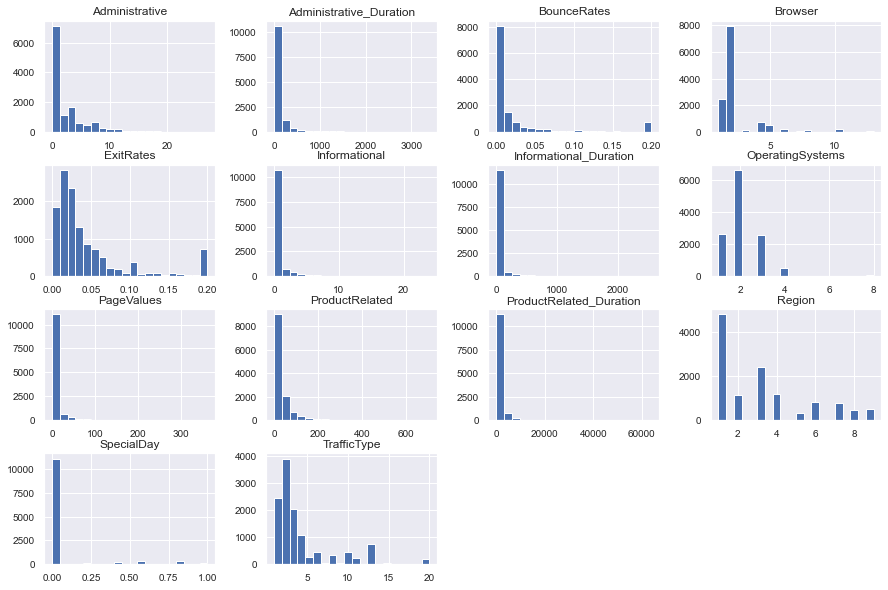

In [9]:
# Distributions for each of numerical variables.
df[numerical_columns].hist(figsize=(15, 10), bins=20, xlabelsize=10, ylabelsize=10)


#### Findings: 
From the plots above, we can see that most of them are extremely right-skewed.
 
These visited values on different pages have a big difference. For example, most of the administrative value is between 0-10, which means visitors may not care much about the administration. However, the value of product-related websites is higher(0-200), which means visitors care more about the products' info and prefer to view these websites.

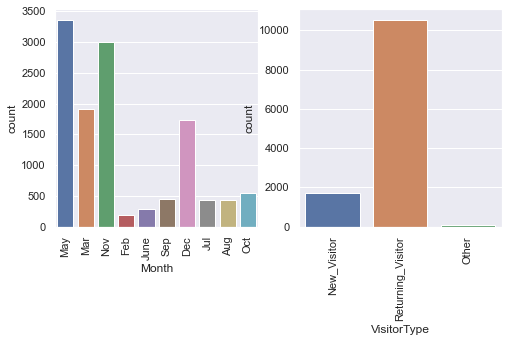

In [10]:
# create the bar chart for each categorical columns
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        

For the month variable, May, Nov, and Dec have the most counts, and Feb has the least count. 

For the visitor type, most of the visitors are returning visitors. 

We can see that the page views have an obvious difference. In May, March, November, and December the page visited is noticeable higher than others. And most of the visitors are new to visite these pages(12000).

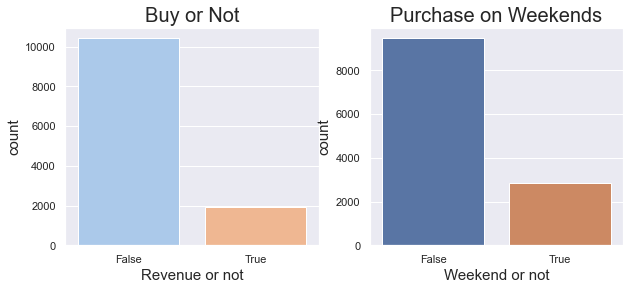

In [11]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.countplot(df02['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'])
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

From the plots above, more visitors didn't make any purchase. And most visitors made purchases on a weekday. 


## 3. Pre-Clustering Data Preparation

### 3.1 Convert numberical variables into categorical variables

Some numerical variables should be categorical, they are OperatingSystems, Browser, TrafficType, and Region. 

In [12]:
df03 = df.copy()

In [13]:
# change data type for categorical feature
df03['OperatingSystems'] = df03['OperatingSystems'].astype('object')
df03['Browser'] = df03['Browser'].astype('object')
df03['Region'] = df03['Region'].astype('object')
df03['TrafficType'] = df03['TrafficType'].astype('object')


### 3.2 Data transformation- boolean variables

**Transform boolean variable in the first dataset:**

In [14]:
# check the number of each value
df03['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [15]:
# Converting 'weekend' boolean to integer 
df03['IsWeekend']  = np.multiply(df03['Weekend'] , 1)
df03['IsWeekend'].value_counts()

0    9462
1    2868
Name: IsWeekend, dtype: int64

**Transform boolean variable in the Project2_Data_Labels.csv file:**

In [16]:
# transfer boolean variable of the Project2_Data_Labels.csv
df02['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [17]:
# Converting 'Revenue' boolean to integer 
df02['IsRevenue']  = np.multiply(df02['Revenue'] , 1)
df02['IsRevenue'].value_counts()

0    10422
1     1908
Name: IsRevenue, dtype: int64

In [18]:
# drop unmeaningful column
df_Revenue = df02.drop(['Revenue'], axis=1)
df04 = df03.drop(['Weekend'], axis=1)

### 3.3 Convert categorical variable into dummy variables.

In [19]:
numerical_columns02 = []
boolean_column02 = []
categorical_columns02 = []

for i in df04.columns[:]:
    if(df04[i].dtype=='object'):
        categorical_columns02.append(i)
    elif (df04[i].dtype=='bool'):
        boolean_column02.append(i)
    else:
        numerical_columns02.append(i)
        
print('1. Numerical variables:',numerical_columns02)
print('2. Boolean variable:',boolean_column02)
print('3. Categorical variables:',categorical_columns02)

1. Numerical variables: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'IsWeekend']
2. Boolean variable: []
3. Categorical variables: ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']


In [20]:
# create the dummy
df05 = pd.get_dummies(df04)
# show dummy column
df05.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'IsWeekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficTy

### 3.4 Standardize the Variables

But before applying Clustering and SVM, we have to normalize the data so that the scale of each variable is the same. For clustering, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like ProductRelated_Duration or Administrative_Duration. For SVM, scaling is important since distance between the data points is important.

We'll use the `StandardScaler()` and `fit_transform` to the data set. 

Since our dunny variables have only two values (0,1), we no need to standardize them.




In [21]:
df06 = df05.copy()

In [22]:
columns_std = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [23]:
from sklearn.preprocessing import StandardScaler
# Standardize the Variables
sc = StandardScaler()
df06[columns_std] = sc.fit_transform(df06[columns_std])
df06.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,...,0,0,0,0,0,0,0,1,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1


## 4. Cluster Modeling 

### 4.1 Hierarchical clustering

The aim of this case is to segment the site visitors of online retailers based on a wide variety of metrics that were captured when someone accesses the web pages. We'll make clusters from this data that can segment similar site visitors together. 

We'll first draw a Dendrogram to identify optimal number of clusters. The dendrogram helps us decide the number of clusters for this case. We'll decide the threshold (cut-off point) of a dendrogram for clustering analysis. A simple way is to select a distance where the branches are longer. 

The linkage method takes the dataset and the method to minimize distances as parameters. We'll use 'ward' as the method since it minimizes then variants of distances between the clusters.


Some codes we used in this step are from this webpage:
http://www.customeranalytics.com.au/2019/05/27/a-beginners-guide-to-hierarchical-clustering-and-how-to-perform-it-in-python/


In [24]:
X = df06.copy()

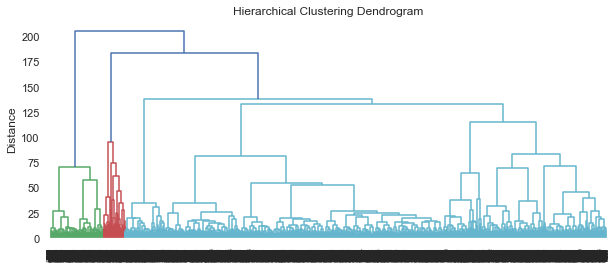

In [25]:
#Creating a Dendrogram to identify optimal number of clusters

import scipy.cluster.hierarchy as sch

#Using Ward method to minimize variance within the clusters
dendrogram=sch.dendrogram(sch.linkage(X, method = 'ward'))

#Plotting the Dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.show()



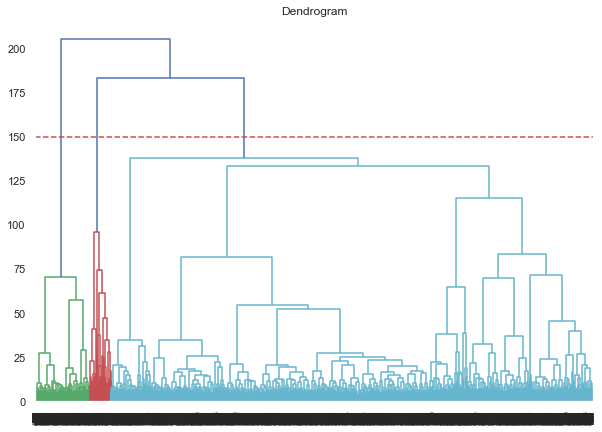

In [37]:
plt.figure(figsize=(10, 7))  
#Plotting the Dendrogram
plt.title("Dendrogram")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')


1. All the single data observations are combined with it's nearest cluster to a new cluster and repeat this step.
2. Finally, all the single clusters are merged into one cluster which has the highest similarity(200)
3. The x-axis contains the samples and the y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 150 and cut the dendrogram.


After we draw a horizontal line that passes through longest distance shown above, we get 3 clusters as this line cuts the dendrogram.


### 4.2 K-means clustering

We'll use the elbow method to determine K - the number of clusters.

The aim of k-means clustering is to find these k clusters and their centers while reducing the total error.
Two methods that can be useful to find this mysterious k in k-Means.These methods are:

* The Elbow Method

* The Silhouette Method


### The Elbow Method:

**Running K-Means with a range of k**

The elbow method runs k-means clustering on the dataset for a range of values for k (from 1-10 in this case) and then for each value of k computes an average score for all clusters.

In [27]:
from sklearn.cluster import KMeans
# use K means to create the model
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    

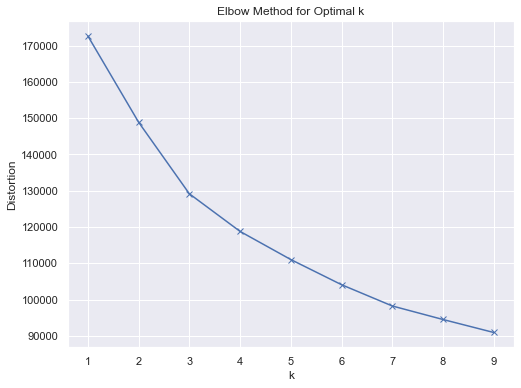

In [28]:
# plot Elbow
plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

We can observe that the “elbow” is the number 3 which is optimal for this case, which means we could cluster the data set into 3 clusters.

### The Silhouette Method

The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

#### Plot Silhouette score:

Text(0, 0.5, 'Silhouette Score')

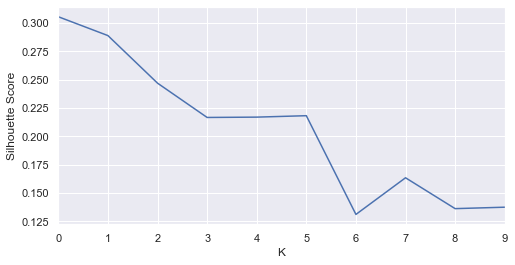

In [30]:
#https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

from sklearn.metrics import silhouette_score

sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
    
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(sil).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Silhouette Score")


#### Results of Silhouette  score:

A high Silhouette Score is desirable. The Silhouette Score reaches its global maximum at the optimal k. This should ideally appear as a peak in the Silhouette Value-versus-k plot. There is a clear peak at k = 2. Hence, it is optimal. 

Also, we will use Silhouette analysis for selecting number of clusters for K-means clustering.

#### Selecting the number of clusters with silhouette analysis on KMeans clustering:

https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/

Silhouette analysis is a way to measure how close each point in a cluster is to the points in its neighboring clusters. It's a neat way to find out the optimum value for k during k-means clustering. Silhouette values lie in the range of (-1, 1). A value of +1 indicates that the sample is far away from its neighboring cluster and very close to the cluster it's assigned. Similarly, the value of -1 indicates that the point is close to its neighboring cluster than to the cluster is assigned. And, a value of 0 means it's at the boundary of the distance between the two clusters. The value of +1 is the idea and -1 is least preferred. Hence, the higher the value better is the cluster configuration.
 
For this to be a good value for the number of clusters, one should consider the following points:
 
Firstly, The mean value should be as close to 1 as possible
Secondly, The plot of each cluster should be above the mean value as much as possible. Any plot region below the mean value is not desirable.
Lastly, the width of the plot should be as uniform as possible.
 
The plots below display the silhouette score with a cluster size of 2,3,4,5,6.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.30548080968008406
For n_clusters = 3 The average silhouette_score is : 0.28886201632842073
For n_clusters = 4 The average silhouette_score is : 0.24691959587628853
For n_clusters = 5 The average silhouette_score is : 0.216296869775764
For n_clusters = 6 The average silhouette_score is : 0.21788305186609916


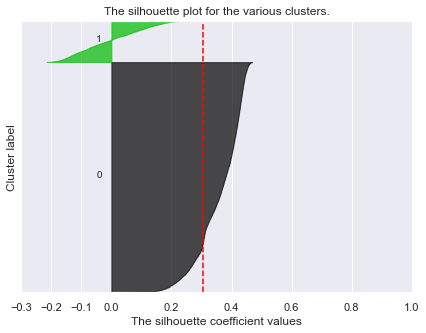

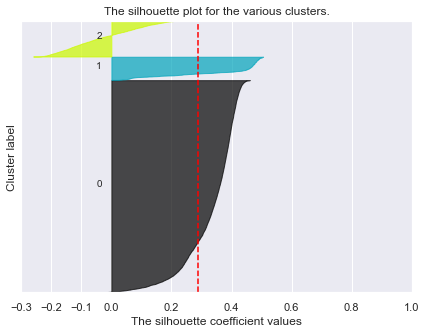

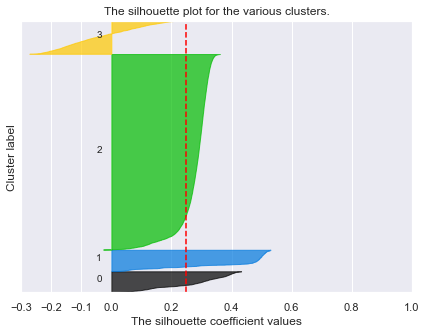

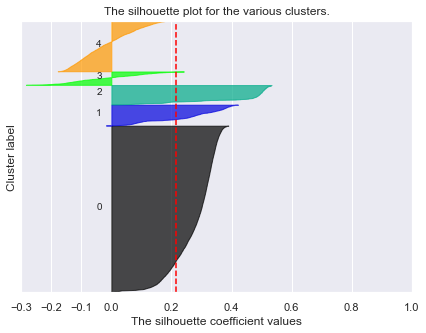

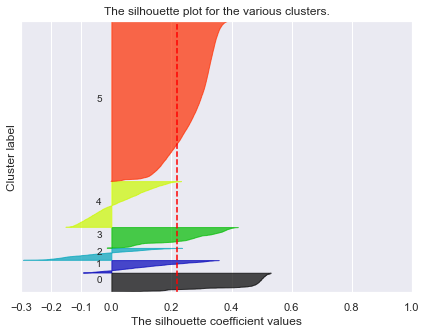

In [31]:
# https://docs.w3cub.com/scikit_learn/auto_examples/cluster/plot_kmeans_silhouette_analysis/#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

from __future__ import print_function

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig,(ax1) = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#### Results of Silhouette Analysis:

FOR K=2: the black region is the plots of the Silhouette score belonging to cluster 0, whereas the green plot is the Silhouette score belonging to cluster 1. The red dotted line is the mean Silhouette score for the cluster in consideration. 

We found out that the cluster of size k=2 is the best cluster size amongst all we tried.

FOR K=2: 
1. The average Silhouette score is 0.31
2. The red dotted line in the plot is the x value of the average silhouette score. 
3. The 2 blocks of color black and green are the silhouette scores of all the samples belong to clusters 1 and 2 respectively. 


### Compare results between Silhouette and hierarchical Dendrogram

According to our K-means analysis above, Elbow has k=3 which is our best clusters; Silhouette score plots indicate K=2 which is our best clusters. And for hierarchical clustering, we selected K=2 as the best hierarchical Dendrogram value. So in this case, we may predict to choose the k=2 as our optimal clusters 



### 4.3 Implement k-means with k=2

We'll perform the k-means clustering model with k=2 and find the centers of 2 clusters formed from the data.

We have stored the identified clusters in a new variable and we will add this to the original dataset.


In [32]:
#Modeling
kmeans = KMeans(n_clusters=2)
kfit = kmeans.fit(X)
identified_clusters = kfit.predict(X)


In [33]:
#Appending the identified clusters to the original data
clustered_data = df04.copy()
clustered_data['Cluster'] = identified_clusters


In [34]:
clustered_data['Cluster'].value_counts()

1    10457
0     1873
Name: Cluster, dtype: int64

#### Findings:

From the results above we can see that the groupings are obviously different. the 0 value(10457) grouping is much higher that 1(1873) value grouping. And the value 0 takes up about 84.8 percentage of all the groupings which means most of the visitors didn't purchase products.



## 5. Post-Clustering Exploratory Data Analysis 



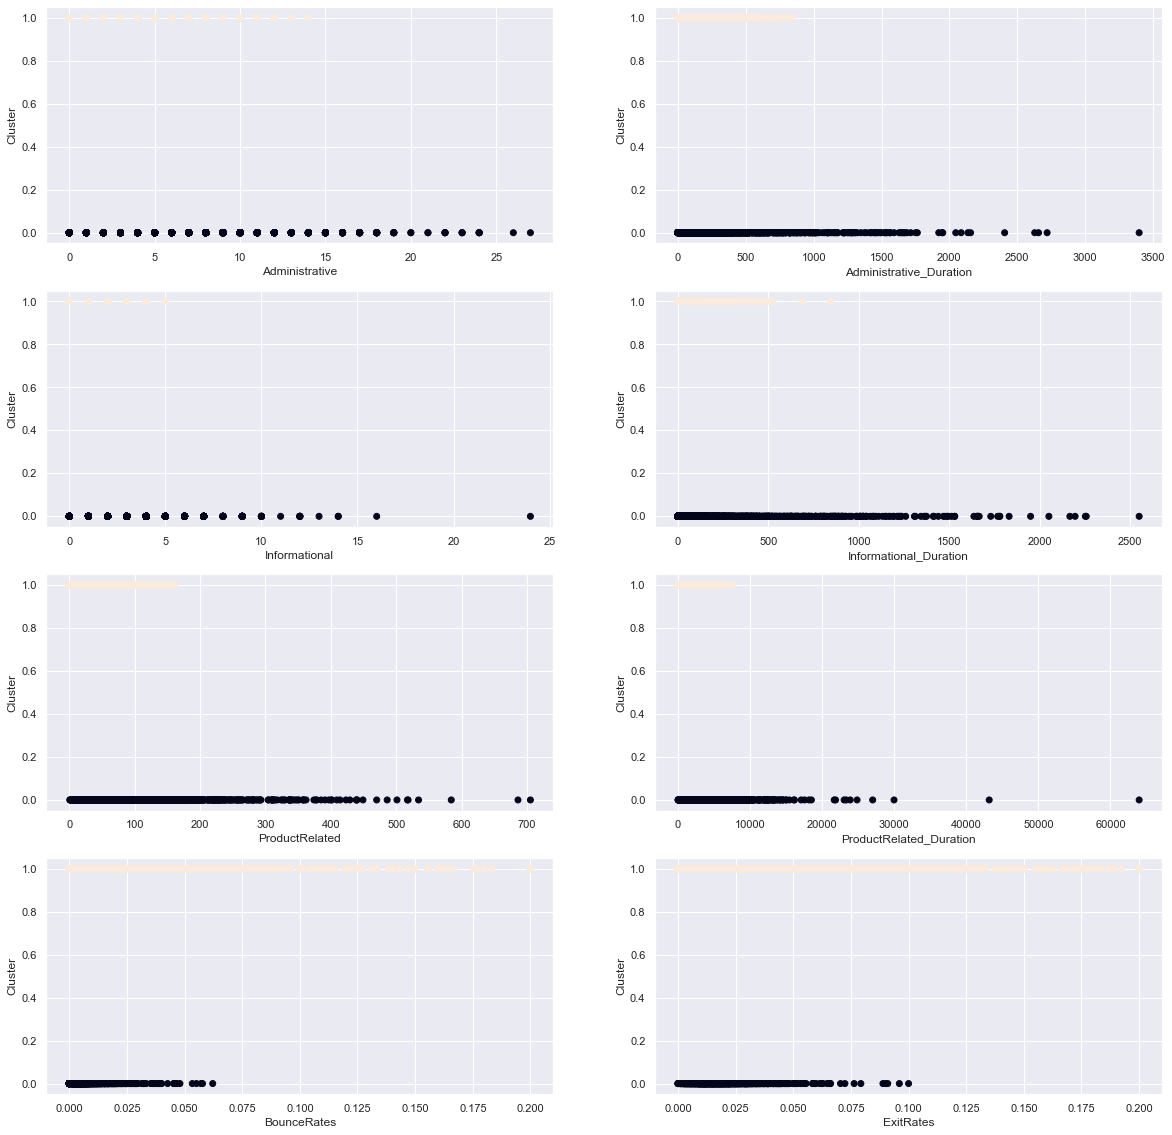

In [40]:
#Plotting the graph

plt.rcParams['figure.figsize'] = (20, 20)

plt.subplot(4, 2, 1)
plt.xlabel('Administrative')
plt.ylabel('Cluster')
plt.scatter(clustered_data['Administrative'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(4, 2, 2)
plt.xlabel('Administrative_Duration')
plt.ylabel('Cluster')
plt.scatter(clustered_data['Administrative_Duration'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(4, 2, 3)
plt.xlabel('Informational')
plt.ylabel('Cluster')
plt.scatter(clustered_data['Informational'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(4, 2, 4)
plt.xlabel('Informational_Duration')
plt.ylabel('Cluster')
plt.scatter(clustered_data['Informational_Duration'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(4, 2, 5)
plt.xlabel('ProductRelated')
plt.ylabel('Cluster')
plt.scatter(clustered_data['ProductRelated'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(4, 2, 6)
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Cluster')
plt.scatter(clustered_data['ProductRelated_Duration'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(4, 2, 7)
plt.xlabel('BounceRates')
plt.ylabel('Cluster')
plt.scatter(clustered_data['BounceRates'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(4, 2, 8)
plt.xlabel('ExitRates')
plt.ylabel('Cluster')
plt.scatter(clustered_data['ExitRates'],clustered_data['Cluster'],c=clustered_data['Cluster'])



From the plots above, we can see that when Administrative is more than 15, Administrative_Duration is more than 800, Informational is more than 5, Informational_Duration is more than 500,ProductRelated is more than 180, ProductRelated_Duration is more than 8000, the visitor is more likely to make a purchase when they spend more time.

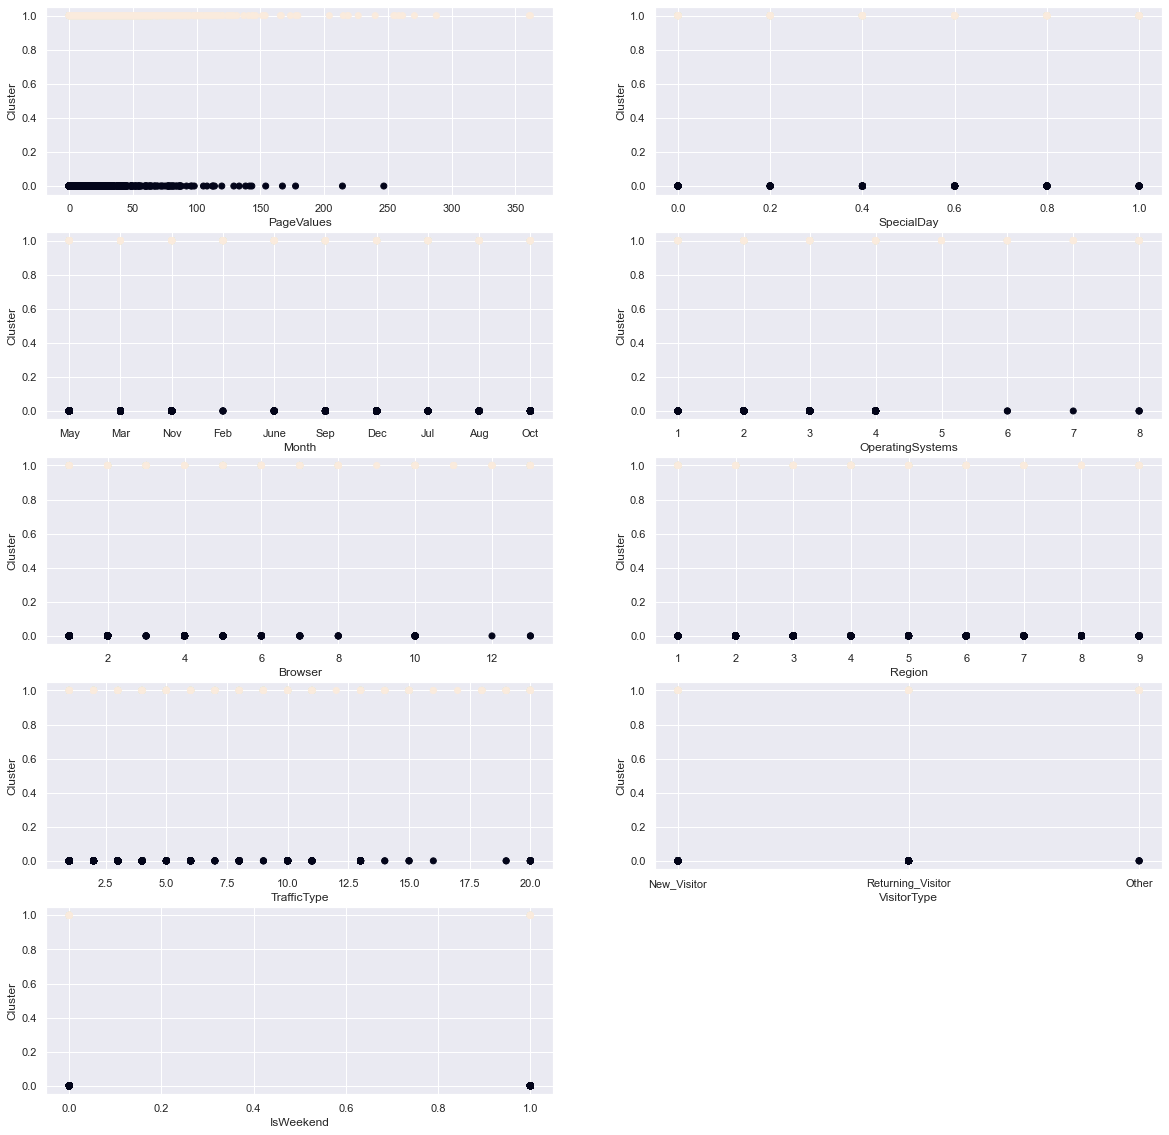

In [41]:
plt.rcParams['figure.figsize'] = (20, 20)

plt.subplot(5, 2, 1)
plt.xlabel('PageValues')
plt.ylabel('Cluster')
plt.scatter(clustered_data['PageValues'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(5, 2, 2)
plt.xlabel('SpecialDay')
plt.ylabel('Cluster')
plt.scatter(clustered_data['SpecialDay'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(5, 2, 3)
plt.xlabel('Month')
plt.ylabel('Cluster')
plt.scatter(clustered_data['Month'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(5, 2, 4)
plt.xlabel('OperatingSystems')
plt.ylabel('Cluster')
plt.scatter(clustered_data['OperatingSystems'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(5, 2, 5)
plt.xlabel('Browser')
plt.ylabel('Cluster')
plt.scatter(clustered_data['Browser'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(5, 2, 6)
plt.xlabel('Region')
plt.ylabel('Cluster')
plt.scatter(clustered_data['Region'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(5, 2, 7)
plt.xlabel('TrafficType')
plt.ylabel('Cluster')
plt.scatter(clustered_data['TrafficType'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(5, 2, 8)
plt.xlabel('VisitorType')
plt.ylabel('Cluster')
plt.scatter(clustered_data['VisitorType'],clustered_data['Cluster'],c=clustered_data['Cluster'])

plt.subplot(5, 2, 9)
plt.xlabel('IsWeekend')
plt.ylabel('Cluster')
plt.scatter(clustered_data['IsWeekend'],clustered_data['Cluster'],c=clustered_data['Cluster'])




For these categorical variables, it seems we can not directly see their relationships with the predicted groupings, so it's better for us to analyse them further below




##  6. Clustering Output vs. Actual Labels 

In [42]:
df11 = clustered_data.copy()

In [43]:
# Add a new column to your Pandas dataframe with the name Revenue
df11 = df11.rename(columns = {"Cluster": "Revenue"}) 

In [44]:
# Project2_Data_Labels.csv file
df02.head()

,Revenue,IsRevenue
0,True,1
1,False,0
2,False,0
3,False,0
4,False,0


In [45]:
# V_Revenue is actual classification labels 
df22 = df02.rename(columns = {"IsRevenue": "V_Revenue"}) 

df22 = df22.drop(['Revenue'], axis=1)

df22.head()

,V_Revenue
0,1
1,0
2,0
3,0
4,0


In [46]:
# merge
df_final = pd.concat([df11, df22], axis=1)

df_final.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,IsWeekend,Revenue,V_Revenue
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,1,1,1
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,0,1,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,0,1,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,0,1,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,0,1,0


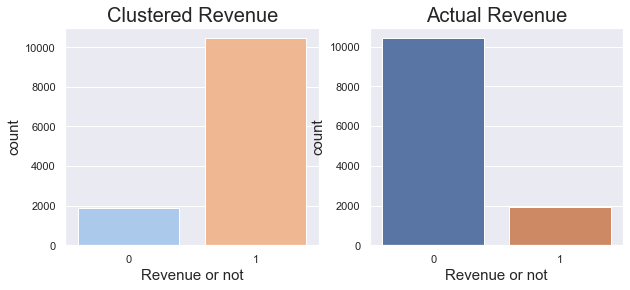

In [65]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.countplot(df_final['Revenue'], palette = 'pastel')
plt.title('Clustered Revenue', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df_final['V_Revenue'])
plt.title('Actual Revenue', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [66]:
df_final['Revenue'].value_counts()

1    10457
0     1873
Name: Revenue, dtype: int64

In [67]:
df_final['V_Revenue'].value_counts()

0    10422
1     1908
Name: V_Revenue, dtype: int64

The revenue of the clustering algorithm seems indicate that 1873 (84.8%) of the web site visitor didn't make purchase. And the actual V_Revenue shows almost the same result(84.5%) that visitors didn't make purhase. So our k=2 seems works well in the k means mode.

## 7. SVM Modeling

In [68]:
df_final02 = df_final.copy()

**Create dummy and the drop the first variable**

In [69]:
# Create dummy
df_final03 = pd.get_dummies(df_final02, drop_first=True)

df_final03.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'IsWeekend',
       'Revenue', 'V_Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13',
       'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7',
       'Region_8', 'Region_9', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType

**Standardize the Numerical Variables (not including binary numerical variables)**

In [70]:
data_SVM = df_final03.copy()

In [71]:
columns_std = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [72]:
# StandardScaler data
sc = StandardScaler()
data_SVM[columns_std] = sc.fit_transform(df_final03[columns_std])
data_SVM.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,...,0,0,0,0,0,0,0,0,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1


**Set up the dataset for next step**

In [73]:
#create dataset
X01 = data_SVM.drop(['Revenue','V_Revenue'], axis=1)

y01 = data_SVM[['Revenue']]

### 1. Feature Selection - Forward selection

We'll use Forward selection to select features. The steps for forward selection technique are as follows:

* Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
* Fit all possible simple regression models by considering one feature at a time. Total ’n’ models are possible. Select the feature with the lowest p-value.
* Fit all possible models with one extra feature added to the previously selected feature(s).
* Again, select the feature with minimum p-value. if p_value < significance level then go to Step 3, otherwise terminate the process.

In [74]:
# https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f

import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [75]:
forward_selection(X01,y01)


C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is dep

C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\13750\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is dep

['Administrative',
 'Informational_Duration',
 'ProductRelated_Duration',
 'Informational',
 'ProductRelated',
 'Administrative_Duration',
 'ExitRates',
 'Month_Nov',
 'VisitorType_Returning_Visitor',
 'TrafficType_14',
 'PageValues',
 'TrafficType_2',
 'BounceRates',
 'Region_5',
 'TrafficType_5',
 'Month_Jul']

In [83]:
X_model01 = X01[['Administrative',
 'Informational_Duration',
 'ProductRelated_Duration',
 'Informational',
 'ProductRelated',
 'Administrative_Duration',
 'ExitRates',
 'Month_Nov',
 'VisitorType_Returning_Visitor',
 'TrafficType_14',
 'PageValues',
 'TrafficType_2',
 'BounceRates',
 'Region_5',
 'TrafficType_5',
 'Month_Jul']]

y_model01 = y01.copy()

From forward_selection, 16 features were selected and will be used for SVM model01.

### 2. Feature selection - based on data type

Also, we would like to use numerical vaiables in the original dataset for the second model.

In [86]:
X_model02 = X01[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'IsWeekend']]

y_model02 = y01.copy()

### 3. Over-sampling using SMOTE

The dataset is not balanced, we'll use SMOTE to balance the dataset, and check the null error rate. 

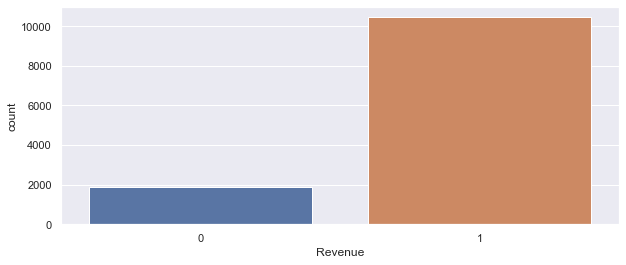

In [87]:
sns.countplot(x='Revenue', data=y01)


In [89]:
from sklearn.model_selection import train_test_split

# Now split the data into training and testing subsets. 
X_train, X_test, y_train, y_test = train_test_split(X_model01, y_model01, test_size=0.2, random_state=0)

# check the results
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (9864, 16) (9864, 1)
Testing dataset shape: (2466, 16) (2466, 1)


In [90]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = X_train.columns
X_resampled_test,y_resampled_test=os.fit_sample(X01, y01)

os_data_X = pd.DataFrame(data=X_resampled_test,columns=columns )
os_data_y= pd.DataFrame(data=y_resampled_test,columns=['Revenue'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(X_resampled_test))
print("Number of no Revenue in oversampled data",len(y_resampled_test[y_resampled_test['Revenue']==0]))
print("Number of Revenue",len(y_resampled_test[y_resampled_test['Revenue']==1]))
print("Proportion of no Revenue data in oversampled data is ",len(y_resampled_test[y_resampled_test['Revenue']==0])/len(X_resampled_test))
print("Proportion of Revenue data in oversampled data is ",len(y_resampled_test[y_resampled_test['Revenue']==1])/len(X_resampled_test))



length of oversampled data is  20914
Number of no Revenue in oversampled data 10457
Number of Revenue 10457
Proportion of no Revenue data in oversampled data is  0.5
Proportion of Revenue data in oversampled data is  0.5


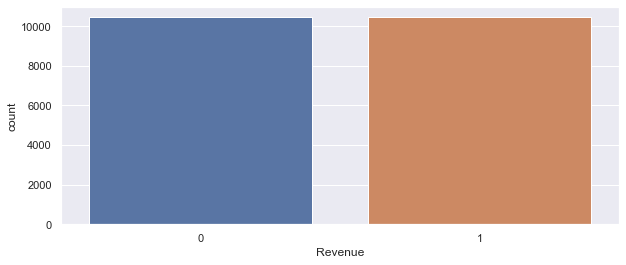

In [91]:
# observe that data has been balanced
sns.countplot(x='Revenue', data=os_data_y)

**Check the null error rate:**

Null Error Rate is how often you would be wrong if you always predicted the majority class.


In [95]:
# Null error rate of the original dataset
1 - y01.Revenue.values.sum() / y01.shape[0]

0.15190592051905916

In [96]:
# null error rate of balanced dataset
# set up dataset after SMOTE
data_train = pd.concat([os_data_X, os_data_y], axis=1)

# what percentage of the training set denied?
data_train.Revenue.values.sum() / data_train.shape[0]

0.5

The null error rate of the imbalanced trianing dataset is 85%, which is great but not reliable since the dataset is imbalanced. After using 'SMOTE' to balance the dataset, the null error rate for the balanced training dataset is reduced from 85% to 50%.

### 4. Separate the dataframe into model training and testing subsets

In [487]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)

# check the results
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)


Training dataset shape: (16731, 68) (16731, 1)
Testing dataset shape: (4183, 68) (4183, 1)


In [482]:
X_train, X_test, y_train, y_test = train_test_split(X01, y01, test_size=0.2, random_state=0)

# check the results
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (9864, 68) (9864, 1)
Testing dataset shape: (2466, 68) (2466, 1)


### 5. SVM model01

The firsr SVM model consists of 16 variables.

In [94]:
# train the model on train set 
SVM_model01 = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0) 

#Create x_train and x_test variables.
X_train_SVM01 = X_train[['ProductRelated',
 'Informational',
 'Administrative',
 'Administrative_Duration',
 'Informational_Duration',
 'ExitRates',
 'Month_Nov',
 'VisitorType_Returning_Visitor',
 'TrafficType_14',
 'PageValues',
 'TrafficType_2',
 'BounceRates',
 'Region_5',
 'ProductRelated_Duration',
 'TrafficType_5',
 'Month_Jul']]

X_test_SVM01 = X_test[['ProductRelated',
 'Informational',
 'Administrative',
 'Administrative_Duration',
 'Informational_Duration',
 'ExitRates',
 'Month_Nov',
 'VisitorType_Returning_Visitor',
 'TrafficType_14',
 'PageValues',
 'TrafficType_2',
 'BounceRates',
 'Region_5',
 'ProductRelated_Duration',
 'TrafficType_5',
 'Month_Jul']]

#fit the model
SVM_model01.fit(X_train_SVM01, y_train.values.ravel()) 

#Predict test data set.
y_pred01 = SVM_model01.predict(X_test_SVM01)


### 6. SVM model02

The second model has 11 features.

In [504]:
# train the model on train set 
SVM_model02 = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0) 

#Create x_train and x_test variables.
X_train_SVM02 = X_train[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'IsWeekend']]

X_test_SVM02 = X_test[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'IsWeekend']]

#fit the model
SVM_model02.fit(X_train_SVM02, y_train.values.ravel()) 

#Predict test data set.
y_pred02 = SVM_model02.predict(X_test_SVM02)

### 7. Evaluate SVM Models and Select a Final Model

#### Create a function for model_report

In [490]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [505]:
# generate_model_report on the testing dataset
print("Model 01:")
generate_model_report(y_test, y_pred01)
print("-------------------------------------------")

print("Model 02:")
generate_model_report(y_test, y_pred02)
print("-------------------------------------------")

Model 01:
Accuracy =  0.9980874970117141
Precision =  0.9961832061068703
Recall =  1.0
F1 Score =  0.9980879541108987
-------------------------------------------
Model 02:
Accuracy =  0.9978484341381784
Precision =  0.9957081545064378
Recall =  1.0
F1 Score =  0.9978494623655914
-------------------------------------------


**Create a function for Cross-Validation**

In [492]:
# Model Evaluation Using Cross-Validation
def cv_scores (model, X_train, y_train):
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy',)
    print('trainging dataset each cv score:',cv_scores)
    print('Model Mean Accuracy (training datasert):{} '.format(np.mean(cv_scores)))
    

In [501]:
# Cross-Validation
cv_scores (SVM_model01, X_train_SVM01, y_train.values.ravel())

trainging dataset each cv score: [1.   1.   1.   0.99 1.   1.   1.   1.   1.   1.  ]
Model Mean Accuracy (training datasert):0.9980275669302529 


In [502]:
# Cross-Validation
cv_scores (SVM_model02, X_train_SVM02, y_train.values.ravel())

trainging dataset each cv score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Model Mean Accuracy (training datasert):0.9981470769498844 


**Compare model evaluation:**


| Metric        | Model 1 | Model 2 | 
| ------------- | ------- | ------- | 
| # Indep. Vars |  16     |   11    |     
| The Accuracy of the model  | 0.998  | 0.998  | 
| Accuracy      | 0.998  | 0.998  |  
| Precision     | 0.996  | 0.997  |
| F1 Score      | 0.998  | 0.998  | 
| Recall           |1  | 1 | 

#### Results:

We performed Cross-Validation to evaluate the training model. Two models have the same accuracy score.

For the test dataset, we performed accuracy, Precision, F1 Score, and Recall to evaluate the SVM models. Two models have almost the same results that means similar classification performance can be achieved with less number of features. We'll pick the second model as our model since it has less features than the first model.

## 8. Clustering + SVM Output vs. Actual Labels 

In [507]:
# use model02 to predice the revenue
X_final = X01[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'IsWeekend']]

#fit the model
SVM_model02.fit(X_final, y01.values.ravel()) 

#Predict test data set.
y_pred_final = SVM_model02.predict(X_final)

In [515]:
# put data into a dataframe
df_pred = pd.DataFrame(y_pred_final, columns=y01.columns)
df_pred02 = df_pred.rename(columns = {"Revenue": "Pred_Revenue"}) 


In [576]:
# merge all together
data_final = pd.concat([df_final, df_pred02], axis=1)

data_final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,IsWeekend,Revenue,V_Revenue,Pred_Revenue
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,1,0,1,0
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,0,0,0,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,0,0,0,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,0,0,0,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,0,0,0,0


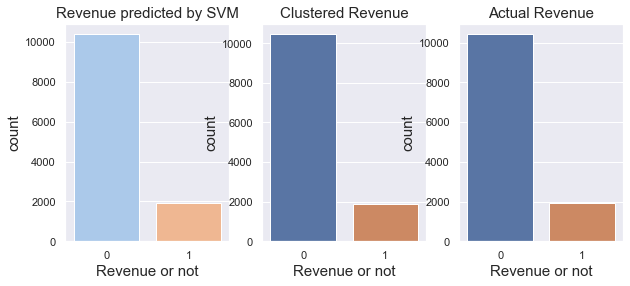

In [525]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 3, 1)
sns.countplot(data_final['Pred_Revenue'], palette = 'pastel')
plt.title('Revenue predicted by SVM', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

# checking the Distribution of customers on Weekend
plt.subplot(1, 3, 2)
sns.countplot(data_final['Revenue'])
plt.title('Clustered Revenue', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

# checking the Distribution of customers on Weekend
plt.subplot(1, 3, 3)
sns.countplot(data_final['V_Revenue'])
plt.title('Actual Revenue', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

From the plots above, we can see that the SVM, Clustering model, and actual classification have the similar total number of revenue=1. Next, we'll compare the values predicted by the models with the actual labels. 

**Clustered revenue vs. Actual revenue**

In [577]:
# clustered revenue vs. actual revenue
data_final['compare_cluster'] = np.where(data_final['Revenue']==data_final['V_Revenue'], 
                                           'yes', 'no')

data_final['compare_cluster'].value_counts()

yes    9591
no     2739
Name: compare_cluster, dtype: int64

In [578]:
print("Proportion of cluster Revenue eaqual to the actual Revenue is ",len(data_final[data_final['compare_cluster']=='yes'])/len(data_final))


Proportion of cluster Revenue eaqual to the actual Revenue is  0.7778588807785888


**SVM revenue vs. Actual revenue**

In [579]:
# SVM revenue vs. actual revenue
data_final['compare_SVM'] = np.where(data_final['Pred_Revenue']==data_final['V_Revenue'], 
                                           'yes', 'no')
data_final['compare_SVM'].value_counts()

yes    9552
no     2778
Name: compare_SVM, dtype: int64

In [574]:
print("Proportion of cluster Revenue eaqual to the actual Revenue is ",len(data_final[data_final['compare_SVM']=='yes'])/len(data_final))


Proportion of cluster Revenue eaqual to the actual Revenue is  0.7746958637469586


#### Findings:

1. The labels in the column of 'Revenue' are the results of the Clustering. The column of 'V_Revenue' includes the actual labels. The values in the column of 'Pred_Revenue' are the results of the SVM model.
2. For the Clustering, 78% of the samples can be correctly predicted by using our clustering model.
3. For SVM, 77% of the samples can be correctly predicted by using our SVM model.

## 9. Conclusion:

We'll compare how the SVM model can predict if a web site visitor made a purchase. 

In [607]:
# a web site visitor made a purchase and can be predicted
df_comp = data_final[(data_final['V_Revenue']==1) & (data_final['Pred_Revenue']==1)]
df_comp02 = df_comp.describe().T[['mean','max']]
df_comp02 = df_comp02.rename(columns = {"mean": "mean_Yes","max": "max_Yes"}) 

## a web site visitor made a purchase and cannot be predicted
df_comp03 = data_final[(data_final['V_Revenue']==1) & (data_final['Pred_Revenue']==0)]
df_comp04 = df_comp03.describe().T[['mean','max']]
df_comp04 = df_comp04.rename(columns = {"mean": "mean_no","max": "max_no"}) 

# merge
df_comp_final = pd.concat([df_comp02, df_comp04], axis=1)

df_comp_final

,mean_Yes,max_Yes,mean_no,max_no
Administrative,7.148496,26.000000,1.941860,13.000000
Administrative_Duration,278.853781,2086.750000,57.866147,702.000000
Informational,2.206767,12.000000,0.236919,5.000000
Informational_Duration,181.328325,1767.666667,9.779021,499.000000
ProductRelated,102.347744,534.000000,27.279070,161.000000
ProductRelated_Duration,4000.683564,27009.859430,1054.828698,6384.366987
BounceRates,0.004761,0.036207,0.005255,0.200000
ExitRates,0.016659,0.067625,0.020675,0.200000
PageValues,18.620821,214.306663,30.606413,361.763742
SpecialDay,0.007895,0.800000,0.029070,1.000000


#### Findings:

From the results above, **A web site visitor made a purchase and can be predicted** are those:
in the SVM model02, 

1. Administrative >13
2. Administrative_Duration >702
3. Informational >5
4. Informational_Duration >499
5. ProductRelated >161
6. ProductRelated_Duration >6384.37

**A web site visitor made a purchase and cannot be predicted** are those:
in the SVM model02, 

7. BounceRates >0.036
8. ExitRates >0.068
9. PageValues >214.3

Also, the final SVM has 11 features: 'Administrative','Administrative_Duration','Informational',
'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'IsWeekend'. 
